In [ ]:
pip install pandas

In [ ]:
pip install numpy

In [1]:
import numpy as np # 导入 as 用作重命名
import pandas as pd

1. 读取文件

In [ ]:
DataFrame 二维表结构 read_csv 可以将文本化数据读取成结构化数据
一般空值缺失值： NAN,NULL,NONE

In [2]:
df = pd.read_csv('./wine3.csv')

In [3]:
df.head()

,type,alcohol,malic,ash,alcalinity,magnesium,phenols,flavanoids,nonflavanoids,proanthocyanins,color,hue,dilution,proline,particular year
0,A,13.20,1.78,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065,22.0
1,A,13.20,1.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.38,1.05,3.40,1050,38.0
2,A,13.16,2.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.68,1.03,3.17,1185,26.0
3,A,14.37,1.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.80,0.86,3.45,1480,35.0
4,A,13.24,2.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.32,1.04,2.93,735,35.0


2. 缺失值处理方式
   
删除：

   按行删除：
   
   按列删除： 该列数据超过20%缺失，可以考虑删除该列
   
填充： 通过特殊值填充，如：均值（数据为浮点性），中位数，众数（数据字符串），0

sklearn 也可以处理缺失值，填充 算法预测

In [4]:
df.isnull().sum()

type                 0
alcohol              0
malic                5
ash                  4
alcalinity           4
magnesium            4
phenols            169
flavanoids           4
nonflavanoids        4
proanthocyanins      4
color                0
hue                  0
dilution             0
proline              0
particular year      3
dtype: int64

In [5]:
df.shape # 查看行列数

(178, 15)

In [6]:
del df['phenols'] # 删除列

In [7]:
df.shape

(178, 14)

In [8]:
df.info() # 查看每列数据类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   type             178 non-null    object 
 1   alcohol          178 non-null    float64
 2   malic            173 non-null    float64
 3   ash              174 non-null    float64
 4   alcalinity       174 non-null    float64
 5   magnesium        174 non-null    float64
 6   flavanoids       174 non-null    float64
 7   nonflavanoids    174 non-null    float64
 8   proanthocyanins  174 non-null    float64
 9   color            178 non-null    float64
 10  hue              178 non-null    float64
 11  dilution         178 non-null    float64
 12  proline          178 non-null    int64  
 13  particular year  175 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 19.6+ KB


np.nan 代表缺失值，可能是上面提到的三种



In [ ]:
df['malic'] = df['malic'].replace(np.nan,df['malic']).mean()) # 填充

In [11]:
df_drop = df.dropna(axis= 0, how='any') 
# aixs : 0 按行删除； 
# how :any 只要有一个数据缺失就将该行删除，all 表示这一行全部缺失的时候才删除

In [12]:
df_drop.isnull().sum()

type               0
alcohol            0
malic              0
ash                0
alcalinity         0
magnesium          0
flavanoids         0
nonflavanoids      0
proanthocyanins    0
color              0
hue                0
dilution           0
proline            0
particular year    0
dtype: int64

3. 异常值处理
   
异常值：

   偏离正常样本过多的值，也叫噪声点，离群点，一般是极大或者极小的值
   
   但不是错误值，只有数值类型（有数值含义）数据才会有异常值
   
   处理：同缺失值
   
    删除： 按行删除
    替换： 使用特殊值替换，（当做缺失值处理）
    
异常值检测

   箱线图：
   
       Q3 + 1.5IQR < X < Q1 - 1.5IQR  
       IQR = Q3 - Q1  
       Q3: 75% 分位数 Q: 25% 分位数 
       1.5 : 经验值，可容忍范围，可根据实际情况调整
       
   3σ 原则: z-score
   
      |x- μ| > 3σ   
      σ 标准差 μ 均值

务必根据实际情况分析， 比如年龄,可以设定 1-100 范围为正常值，则不需要再进行上述检测

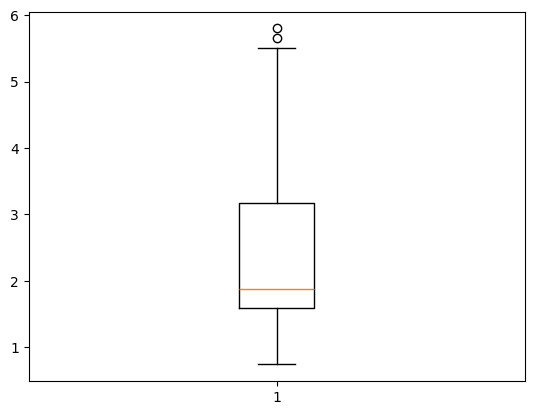

In [13]:
import matplotlib.pyplot as plt
plt.boxplot(df_drop['malic'])
plt.show()

3.1 箱线图：进行异常值检测

In [32]:
while True:
    list_error = []
    Q1 = df_drop['malic'].quantile(0.25)
    Q3 = df_drop['malic'].quantile(0.75)
    IQR = Q3 - Q1
    up = Q3 + 1.5*IQR
    down = Q1 - 1.5*IQR
    n = 0
    for x in df_drop['malic']:
        if x > up or x<down :
            print(x)
            df_drop.loc[:, 'malic'] = df_drop['malic'].replace(x,df_drop['malic'].mean()) # 填充 
            list_error.append(x)
    if len(list_error) == 0:
        break


5.19


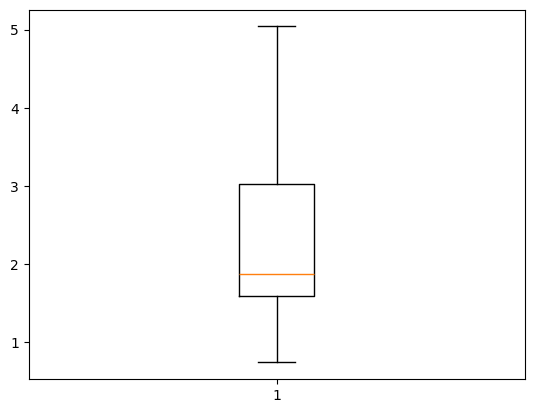

In [33]:
for x in df_drop['malic']:
    if x > up or x<down :
        print(x)
plt.boxplot(df_drop['malic'])
plt.show()

3.2 3σ 原则: z-score

      |x- μ| > 3σ   

In [37]:
import  warnings
warnings.filterwarnings('ignore')

In [39]:
mean = df_drop['ash'].mean()
std = np.std(df_drop['ash'])
for x in df_drop['ash'].index:
    if np.abs(df_drop['ash'][x] - mean)>3*std:
        print(df_drop['ash'][x])
        df_drop.drop(axis=0,index=x,inplace=True)

4. 拆分数据

In [44]:
# 纵向拆分
X= df_drop.drop(axis=1, columns='type')
Y = df_drop[['type']]

In [42]:
pip install scikit-learn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


5. 建模

In [45]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [46]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, Y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


6. 评估

In [47]:
model_knn.score(X_test,Y_test)

0.5510204081632653

7. 保存模型

In [48]:
pip install joblib


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [49]:
import joblib

joblib.dump(model_knn, './红酒等级预测.pkl')

['./红酒等级预测.pkl']